#**Miniproyecto de regresion lineal**

JHON JAIRO CASTILLO CIFUENTES

2167742


***INTRODUCCION***

En machine learning se usan varios metodos para analizar datos, como lo son la clasificacion, la agrupacion y la regresion lineal.

Es por esto que en este proyecto con el fin de afianzar los conocimientos sobre los conceptos de regresion lineal vistos durante el curso se realizará el analisis de un dataset a partir de diferentes metodos para lograr la regrsion lineal, estableciendo el error y observando como actua cada metodo sobre los datos.

**DESARROLLO**

Como primer paso se deben establecer las librerias necesarias para realizar los diferentes analisis tanto graficos como de trabajo de vectores entre otros.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#Analisis del dataset

Este dataset es un conjunto de datos en el cual se evalua la toxicidad del agua hacia el pececillo de cabeza gorda. esto a partir de 908 muestras de diferentes quimicos. Donde se mide la concentracion de causa de muerte a partir de el LC50 como variable de salida. Para ello se utilizaron 6 descriptores moleculares con los cuales se puede predecir la toxicidad del agua. estos son CIC0 (índices de información), GATS1i (autocorrelaciones 2D), NdssC (recuentos de tipos de átomos), NdsCH ((recuentos de tipos de átomos), SM1_Dz (Z) (matrices 2D) descriptores basados ​​en descriptores).

Conociendo los parametros de entrada y salida tenemos un dataset con 7 filas y 908 columnas.

In [3]:
datos=pd.read_excel('datasetRegre.xlsx')
print(datos)


      CICO  SM1_DZ  GATS1i   NdsCH  NdssC  MLOGP   LC50
0    3.260   0.829   1.676       0      1  1.453  3.770
1    2.189   0.580   0.863       0      0  1.348  3.115
2    2.125   0.638   0.831       0      0  1.348  3.531
3    3.027   0.331   1.472       1      0  1.807  3.510
4    2.094   0.827   0.860       0      0  1.886  5.390
..     ...     ...     ...     ...    ...    ...    ...
903  2.801   0.728   2.226       0      2  0.736  3.109
904  3.652   0.872   0.867       2      3  3.983  4.040
905  3.763   0.916   0.878       0      6  2.918  4.818
906  2.831   1.393   1.077       0      1  0.906  5.317
907  4.057   1.032   1.183       1      3  4.754  8.201

[908 rows x 7 columns]


A continuacion se verifica si hay datos nulos o vacios en el dataset.

In [6]:
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

,Total,%
LC50,0,0.0
MLOGP,0,0.0
NdssC,0,0.0
NdsCH,0,0.0
GATS1i,0,0.0
SM1_DZ,0,0.0
CICO,0,0.0


Como se puede apreciar este dataset no tiene datos nulos lo que facilita el trabajo ya que no se debe eliminar o agregar ninguna columna o fila.

In [7]:
datos.describe()

,CICO,SM1_DZ,GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


En el codigo anterior se realizo una descripcion del dataset donde podemos ver los diferentes valores estadisticos de cada una de las variables como lo son el numero de datos, la media, los minimos, los maximos y los diferentes percentiles para cada variable

A continucacion queremos averiguar la correlacion de cada variable con respecto a la salida, para ello realizamos un mapa de calor y graficamos el comportamiento de cada variable con respecto a las demas.

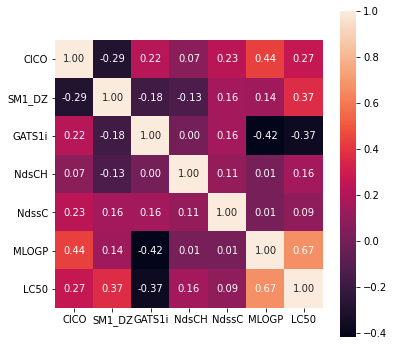

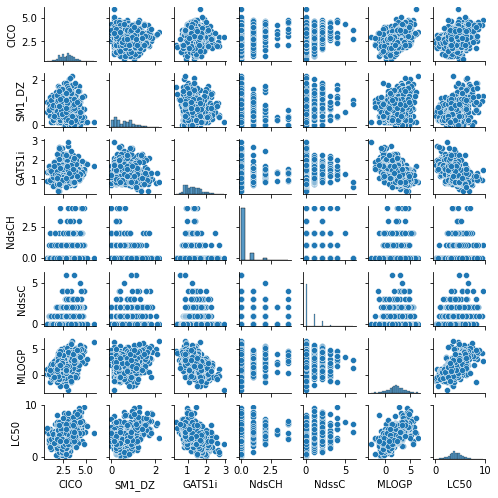

In [8]:
fig,ax=plt.subplots(figsize=(6,6))
correlacion=datos.corr(method='spearman')
sns.heatmap(correlacion,annot=True, fmt=".2f",square=True)
sns.pairplot(datos,height=1,aspect=1)
plt.show()

A partir de la correlacion con respecto a la salida LC50(6) se escogieron las variables con una correlacion mayor al 30%,estas variables se encuentran en las columnas SM1_DZ(1) con una correlacion de 37%, GATS1i (2) con 37% de correlacion, MLOGP(5) siendo la variable con mayor correlacion la cual es de 67%, mientras las otras columnas son menores al 30% es decir no son tan relevantes para encontrar la informacion de salida.

Conociendo esto creamos un nuevo dataset al cual se le da el nombre de datos_sel para trabajar solo con las variebles que mas correlacion tienen con respecto a nuestra salida.

In [9]:
datos_sel=datos.iloc[:,[1,2,5,6]]
datos_sel

,SM1_DZ,GATS1i,MLOGP,LC50
0,0.829,1.676,1.453,3.770
1,0.580,0.863,1.348,3.115
2,0.638,0.831,1.348,3.531
3,0.331,1.472,1.807,3.510
4,0.827,0.860,1.886,5.390
...,...,...,...,...
903,0.728,2.226,0.736,3.109
904,0.872,0.867,3.983,4.040
905,0.916,0.878,2.918,4.818
906,1.393,1.077,0.906,5.317


#NORMALIZACION

Una vez se ha realizado el dataset definitivo con el que se va a trabajar se debe normalizar todos los datos tanto de entrada como de salida para disminuir la funcion de costo y que el regresor trabaje de manera mas efectiva y tener mejores resultados.

Para este caso se desea normalizar los valores entre -1 y 1 ya que es un rango optimo para trabajar en regresion lineal.

In [10]:
#normalizar la entrada

scalerx= MinMaxScaler(feature_range=(-1,1))
scalerx.fit(datos_sel.iloc[:,0:3])
x_nor=scalerx.transform(datos_sel.iloc[:,0:3])
x_nor= np.array(x_nor)

#normalizar la salida

scalery= MinMaxScaler(feature_range=(-1,1))
y_nor=datos_sel.iloc[:,3].values
y_nor=y_nor.reshape(-1,1)
scalery.fit(y_nor)
y_nor=scalery.transform(y_nor)
y_nor=np.array(y_nor)

datos_nor= np.append(x_nor,y_nor,1)
datos_nor= pd.DataFrame(datos_nor)
datos_nor


,0,1,2,3
0,-0.236297,0.014263,-0.077136,-0.222304
1,-0.465684,-0.629952,-0.099479,-0.359347
2,-0.412252,-0.655309,-0.099479,-0.272309
3,-0.695071,-0.147385,-0.001809,-0.276703
4,-0.238139,-0.632330,0.015002,0.116644
...,...,...,...,...
903,-0.329341,0.450079,-0.229705,-0.360603
904,-0.196684,-0.626783,0.461219,-0.165812
905,-0.156149,-0.618067,0.234599,-0.003034
906,0.283280,-0.460380,-0.193531,0.101370


A continuacion se realiza un mapa de calor con los valores normalizados, con esto comprobamos que las variables mantienen su correlacion con respecto a la salida y de este modo sabemos que se ha normalizado el dataset satisfactoriamente.

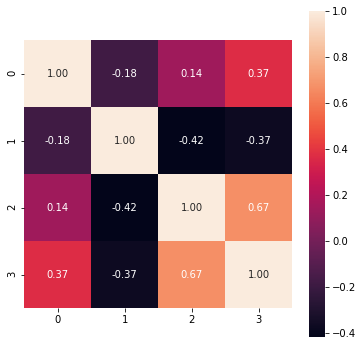

In [11]:
fig,ax=plt.subplots(figsize=(6,6))
correlacionN=datos_nor.corr(method='spearman')
sns.heatmap(correlacionN,annot=True, fmt=".2f",square=True)
plt.show()

#Division de dataset

El siguiente paso es dividir el dataset en datos de validacion y entrenamiento con los cuales se realizaran las diferentes pruebas, para ello se utiliza el dataset normalizado y se divide en 70% entrenamiento y 30% validacion.

In [12]:
xtrain,xtest,ytrain,ytest= train_test_split(x_nor,y_nor,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(635, 3)
(273, 3)
(635, 1)
(273, 1)


Como podemos ver los datos de entrenamiento son 635 por cada variable tanto en las entradas como en la salida y 273 para la validacion en las entradas y la salida.

#Regresion con matrices


Ahora con el dataset dividido y normalizado podemos aplicar los metodos de regresion linela adecuadamente, por lo que empezaremos a hacer la prediccion por el metodo de matrices.

Para ello debemos respetar la siguiente operacion entre matrices

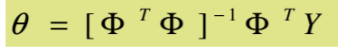

**Datos de entrenamiento**

El primer paso es crear una matriz para phi, esta esta compuesta por una columna de unos y las columnas de entrada del dataset.

In [13]:
phi_entre=np.c_[np.ones((xtrain.shape[0],1)),xtrain]
print(phi_entre.shape)

(635, 4)


Una vez creado phi se realiza la operacion para encontrar los coeficientes de theta

In [14]:
theta=np.linalg.inv(phi_entre.T.dot(phi_entre)).dot(phi_entre.T).dot(ytrain)
print(theta)

[[-0.13855467]
 [ 0.21368394]
 [-0.10635065]
 [ 0.56573747]]


Por ultimo realizamos el producto punto entre phi y theta y asi encontramos la regresion lineal de la entrada de entrenamiento por medio de matrices, ademas se debe desnormalizar los datos para asi encontrar los valores de error de este metodo

In [15]:
YpredM=phi_entre.dot(theta)
Ypred_trainM=scalery.inverse_transform(YpredM)
Yori_trainM= scalery.inverse_transform(ytrain)
Xori_tranM= scalerx.inverse_transform(xtrain)

Al encontrar el error entre los datos originales de la salida con datos de entrenamiento y los datos de salida del regresor obtenemos un error cuadratico medio del 1.0072

In [16]:
mse= mean_squared_error(Yori_trainM,Ypred_trainM)
rmse= np.sqrt(mse)
rmse


1.0072408291062087

Ademas como podemos ver a continuacion el coeficiente de determinacion que proporciona informacion como cual es la calidad del modelo para replicar resultados, para este modelo el r^2 es de 51.94%

In [17]:
from sklearn.metrics import r2_score
r_squared = r2_score(Yori_trainM, Ypred_trainM)
r_squared

0.5194097194454698

**datos de validación**

Para los datos de validacion se realiza el mismo procedimiento que en el anterior, creando un phi pero esta vez ya se tiene el theta que se encontro anteriormente, ya que se desea validar el modelo se debe usar este theta y no crear uno nuevo, de esta manera comprobamos si el regresor esta funcionando para nuevos valores que se le entreguen.

In [18]:
phi_val=np.c_[np.ones((xtest.shape[0],1)),xtest]
print(phi_entre.shape)

(635, 4)


In [19]:
YpredV=phi_val.dot(theta)
Ypred_testM=scalery.inverse_transform(YpredV)
Yori_testM= scalery.inverse_transform(ytest)
Xori_testM= scalerx.inverse_transform(xtest)

In [20]:
mseV= mean_squared_error(Yori_testM,Ypred_testM)
rmseV= np.sqrt(mseV)
rmseV

1.0245677107312785

In [21]:
r_squared = r2_score(Yori_trainM, Ypred_trainM)
r_squared

0.5194097194454698

Como podemos apreciar el rmse para los datos de validacion es del 1.02 mientras el R^2 es de 51.94% 

**Graficos**

A continuacion graficamos el comportamiento de las salidas para entrenamiento y validacion en el regresor con matrices donde los puntos rojos representan la prediccion y los puntos azules los datos originales

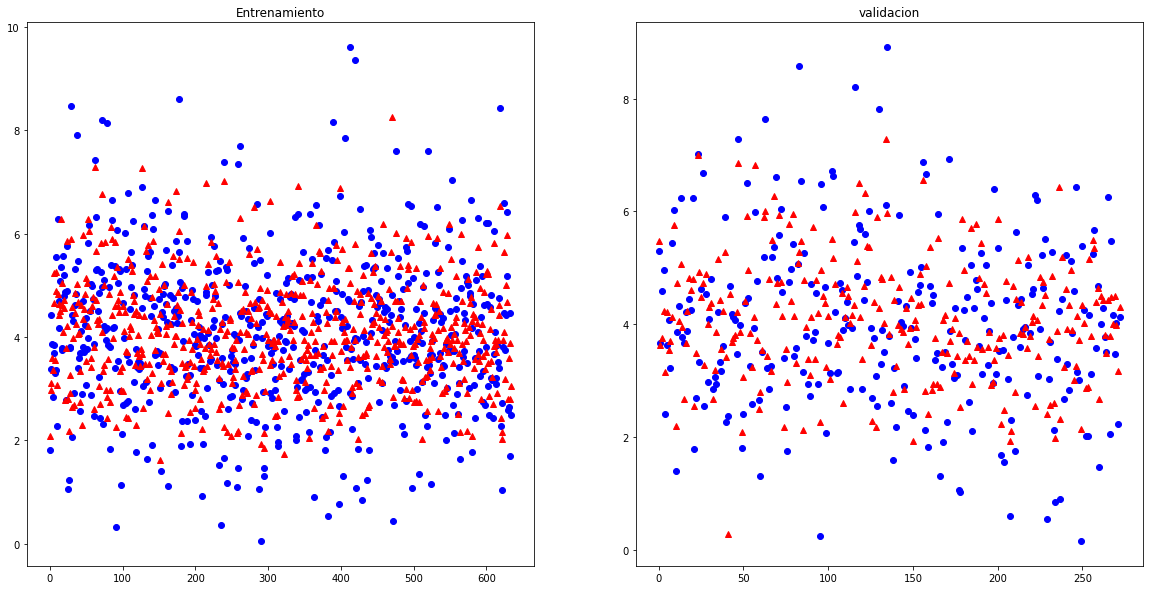

In [ ]:

fig, ax=plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax[0].plot(Yori_trainM,'bo')
ax[0].set_title('Entrenamiento')
ax[0].plot(Ypred_trainM,'r^')
ax[1].set_title('validacion')
ax[1].plot(Yori_testM,'bo')
ax[1].plot(Ypred_testM,'r^')



#Reresion con Scikit-Learn

El segundo metodo que se aplicara es la regresion con Scikit-Lear la cual es una libreria que trae un regresor lineal incorporado y que facilita la escritura de codigo evitando todo el tratamiento de matrices.

**Datos de entrenamiento**

Para trabajar con esta libreria solo basta con llamar la funcion LineraRegression y pasarle los datos con los que se desea trabajar en este caso los datos de entrenamiento y se predice un modelo a partir de la entrada de entrenamiento

In [23]:
Regresor= LinearRegression()
Regresor.fit(xtrain,ytrain)
YpredS= Regresor.predict(xtrain)
Ypred_trainS=scalery.inverse_transform(YpredS)
Yori_trainS= scalery.inverse_transform(ytrain)
Xori_trainS= scalerx.inverse_transform(xtrain)

print("\nPendiente: \n",Regresor.coef_)
print("\nIntercepto: \n",Regresor.intercept_)


Pendiente: 
 [[ 0.21368394 -0.10635065  0.56573747]]

Intercepto: 
 [-0.13855467]


In [24]:
mse= mean_squared_error(Yori_trainS,Ypred_trainS)
rmse= np.sqrt(mse)
r_squared = r2_score(Yori_trainS, Ypred_trainS)
print("\n rmse: ", rmse)
print("\n R2: ", r_squared)


 rmse:  1.0072408291062087

 R2:  0.5194097194454699


Con este metodo obtuvimos un rmse de 1.007 y un R2 de 51.94% tal como  con el metodo de matrices, por otra parte podemos ver los diferentes coeficientes de cada variable asi como el intercepto de la función de la regresion lineal.

**Datos de validación**

Para la validacion se utiliza el modelo creado con los datos de entrenamiento pero evaluando con los datos de entrada de validacion para asi conocer el modelo de prediccion de validacion y comprobar si el regresor esta funcionando correctamente

In [25]:
YpredVS= Regresor.predict(xtest)
Ypred_testS=scalery.inverse_transform(YpredVS)
Yori_testS= scalery.inverse_transform(ytest)
Xori_testS= scalerx.inverse_transform(xtest)

In [27]:
mse= mean_squared_error(Yori_testS,Ypred_testS)
rmse= np.sqrt(mse)
r_squared = r2_score(Yori_testS, Ypred_testS)
print("\n rmse: ", rmse)
print("\n R2: ", r_squared)


 rmse:  1.0245677107312785

 R2:  0.5067180098763221


Para los datos de validacion por el metodo de Scikit-learn se obtuvo un rmse de 1.02 y un R2 de 50.67%

A continuacion se realiza el grafico de comportamiento de los datos de salida tanto para validacion como entrenamiento por este metodo, donde vemos que los datos predichos (rojos) se concentran adecuadamente por el area donde estan los datos originales (azul) lo que nos confirma que se esta realizando una buena regresion.

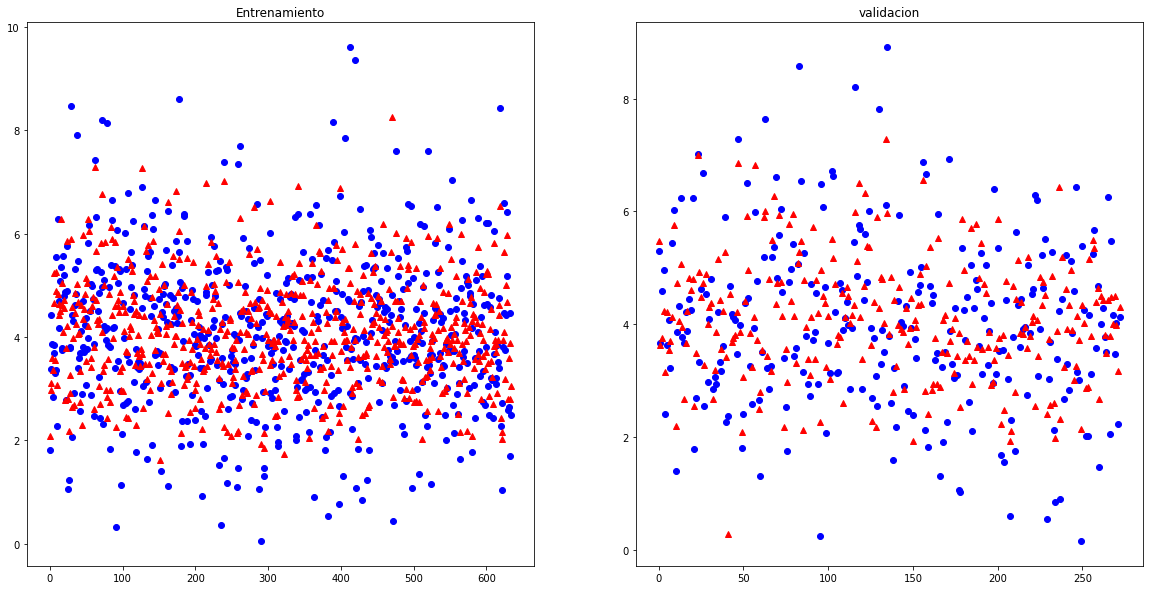

In [ ]:
fig, ax=plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax[0].plot(Yori_trainS,'bo')
ax[0].set_title('Entrenamiento')
ax[0].plot(Ypred_trainS,'r^')
ax[1].set_title('validacion')
ax[1].plot(Yori_testS,'bo')
ax[1].plot(Ypred_testS,'r^')

#Regresion por gradiente decendente

El ultimo metodo es el gradiente descendente, este metodo tiene como caracteristica principal que busca reducir la funcion de costo, ademas de trabajar con la relacion entre las entradas y el error para eso se le debe dar un numero de iteraccione y un ratio de aprendizaje al cual queremos que el modelo de regresion llegue, esto a travez de la evolucion de parametros como theta y la funcion de perdidas.

**Datos de entrenamiento**

el primer paso es crear una matriz phi con las caracteristica mencionadas en el primer metodo.

In [28]:
phiG_entre=np.c_[np.ones((ytrain.shape[0],1)),xtrain]
print(phiG_entre.shape)


(635, 4)


Se define la funcion de perdidas.

In [29]:
def  cal_lost(theta,Phi,y):
    P = len(y)
    predictions = Phi.dot(theta)
    cost = (1/P) * np.sum(np.square(y-predictions))
    return cost

Se proporciona un ratio de aprendizaje y un numero de iteraciones asi como un valor inicial aleatorio para theta

In [30]:
learning_rate =0.02 #Alpha
iterations= 1000
coeficientesTrain=xtrain.shape[1]+1
thetaG=np.random.rand(coeficientesTrain,1)
print(thetaG)

[[0.79428275]
 [0.98166836]
 [0.75139983]
 [0.6386468 ]]


Ahora se realiza el un bucle con el fin de hallar los parametros de theta que mejor se ajusten a el ratio de aprendizaje y el error mas bajo posible

In [31]:
P= len(ytrain)
lost_history = np.zeros(iterations)
theta_history = np.zeros((iterations,thetaG.shape[0]))
for it in range(iterations):
        prediction = phiG_entre.dot(thetaG)
        error=ytrain-prediction
        thetaG = thetaG +(2/P)*learning_rate*( phiG_entre.T.dot(error))
        theta_history[it,:] =thetaG.T
        lost_history[it]  = cal_lost(thetaG,phiG_entre,ytrain)

print("\ncoeficientes: \n",thetaG[:,0])



coeficientes: 
 [-0.1073497   0.23428579 -0.02482126  0.62339693]


Una vez se tiene los coeficientes de theta se procede a hacer la prediccion de el modelo de netrenamiento a partir de la entrada de entrenamiento como se muestra a continuacion.

In [32]:

ypred_trainG=phiG_entre.dot(thetaG)
Ypred_trainG=scalery.inverse_transform(ypred_trainG)
Yori_trainG= scalery.inverse_transform(ytrain)
Xori_trainG= scalerx.inverse_transform(xtrain)

mse= mean_squared_error(Yori_trainG,ypred_trainG)
rmse= np.sqrt(mse)

r_squared = r2_score(Yori_trainS, Ypred_trainS)
print("\n rmse: ", rmse)
print("\n R2: ", r_squared)


 rmse:  4.430597649653077

 R2:  0.5194097194454699


Como podemos apreciar para este metodo el rmse aumento de 1 a 4.43 y el R2 se mantiene alrededor del 51.94%

A continuacion se presenta la grafica de la funcion de perdidas con respecto a las iteraciones, donde podemos deducir que la perdida maxima llega aproximadamente por la iteraccion 800.

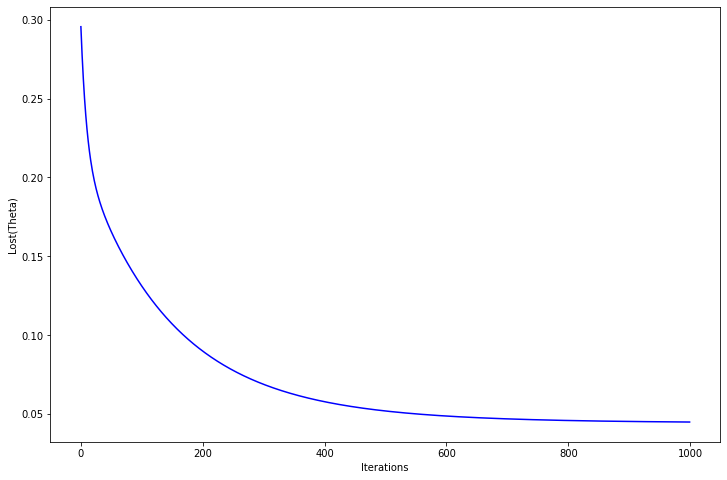

In [33]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Lost(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),lost_history,'b')


Por otra parte se realiza la grafica de la evolucion de theta para cada una de las variables obteniendo el siguiente grafico.

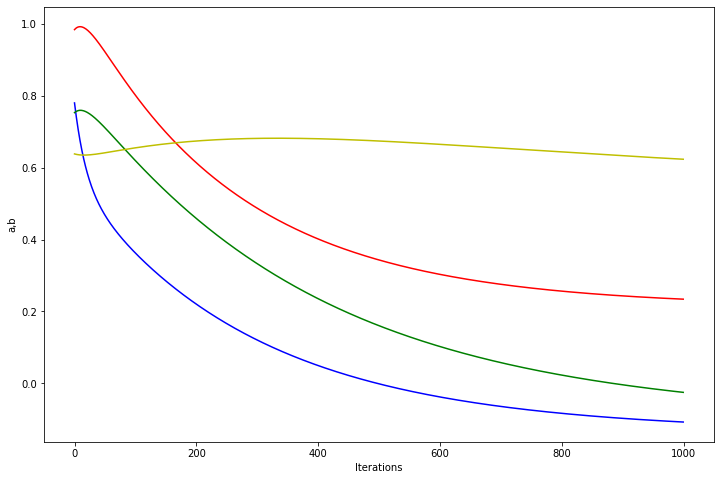

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('a,b')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),theta_history[:,0],'b')
_=ax.plot(range(iterations),theta_history[:,1],'r')
_=ax.plot(range(iterations),theta_history[:,2],'g')
_=ax.plot(range(iterations),theta_history[:,3],'y')

**Datos de validacion**

Ahora que ya tenemos un theta definido se procede a comprobar el modelo a traves de los datos de validación.

In [36]:
phiG_val=np.c_[np.ones((ytest.shape[0],1)),xtest]

ypred_testG=phiG_val.dot(thetaG)
Ypred_testG=scalery.inverse_transform(ypred_testG)
Yori_testG= scalery.inverse_transform(ytest)
Xori_testG= scalerx.inverse_transform(xtest)

mse= mean_squared_error(Yori_testG,ypred_testG)
rmse= np.sqrt(mse)
r_squared = r2_score(Yori_trainS, Ypred_trainS)
print("\n rmse: ", rmse)
print("\n R2: ", r_squared)


 rmse:  4.394651043096424

 R2:  0.5194097194454699


Podemos comprobar para los datos de validacion que el rmse es de 4.39 y el R2 tambien es de 51.94%, lo que hace que este metodo sea tambien eficiente.

Por ultimo se realiza la grafica de comportamiento de la salida predicha (rojo) frente a la salida original(azul) y podemos ver que la predicha actua bien frente a los valores originales.

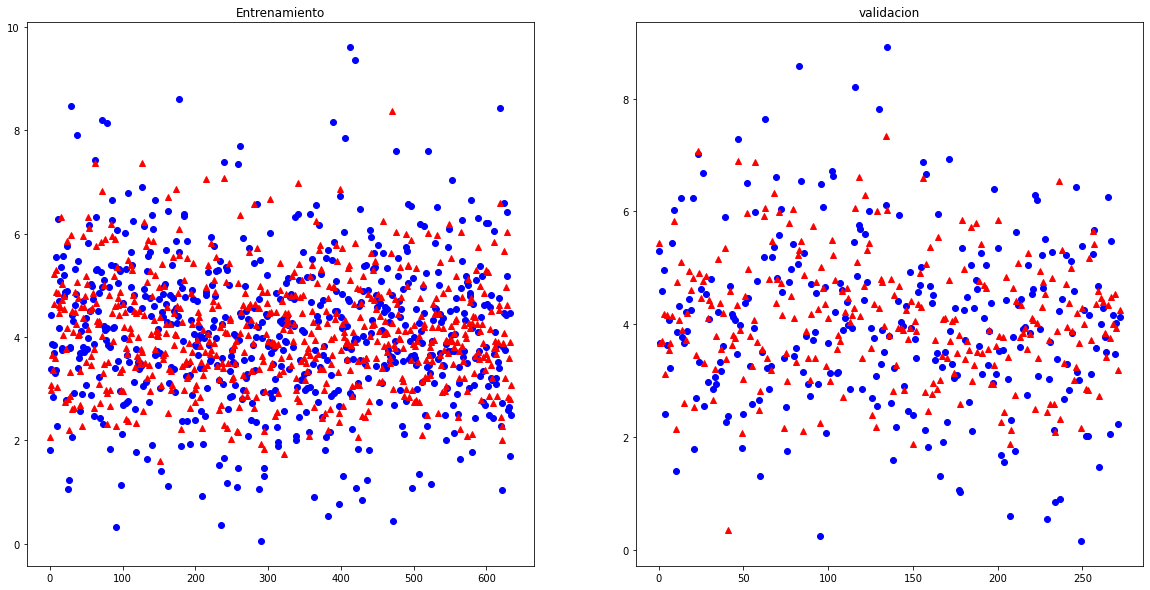

In [ ]:
fig, ax=plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax[0].plot(Yori_trainG,'bo')
ax[0].set_title('Entrenamiento')
ax[0].plot(Ypred_trainG,'r^')
ax[1].set_title('validacion')
ax[1].plot(Yori_testG,'bo')
ax[1].plot(Ypred_testG,'r^')

**Graficos de variables en cada metodo**

Para finalizar se realiza la grafica de cada variable en cuanto a datos predichos con respecto a los originales, es decir para cada entrada un grafico tanto para entrenamiento (columnas impares) como para validacion (columnas pares).

Donde la primera fila de graficos corresponde a el metodo de matrices, la segunda fila al metodo de scikit learn y la tercera fila a el metodo de gradiente descendente.

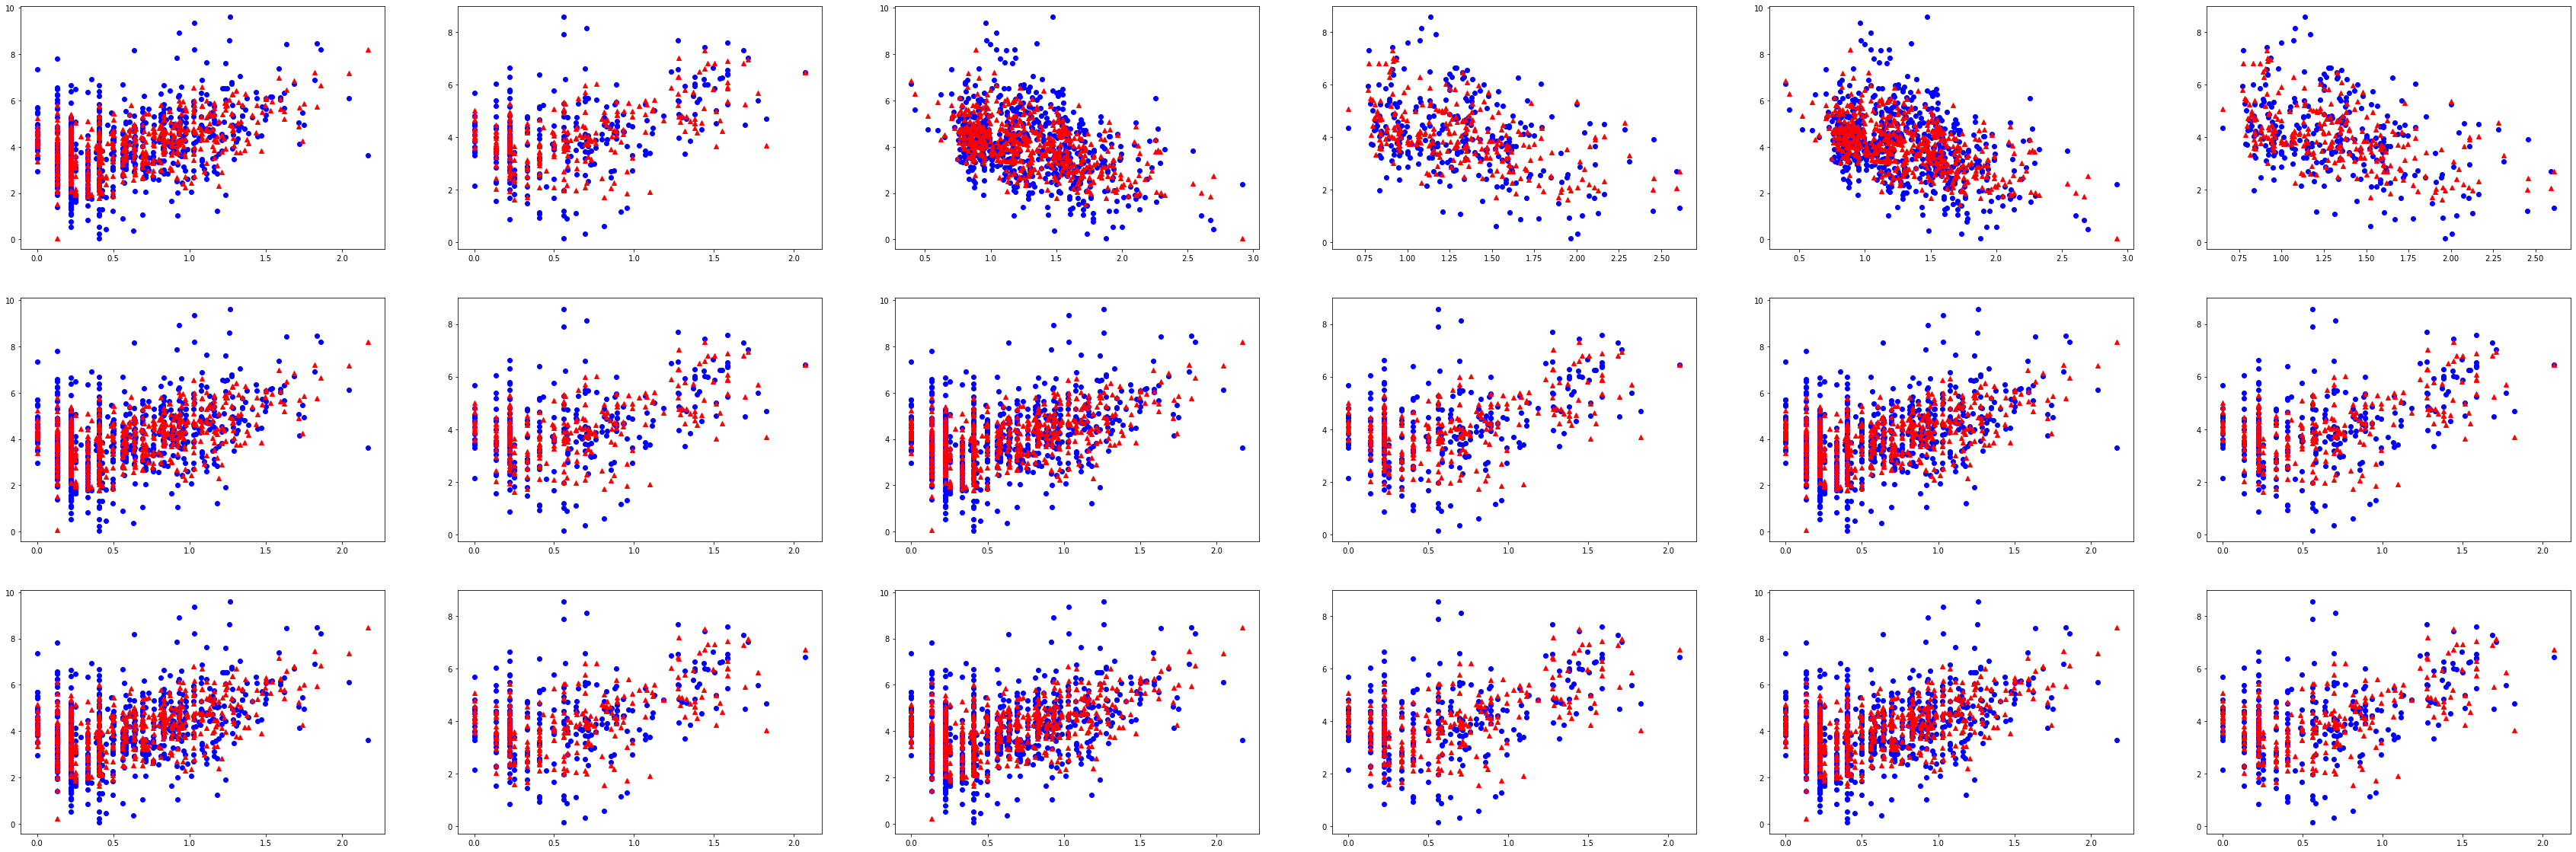

In [37]:
filas=3
columnas = (x_nor.shape[1])*2
cont=0
v=0
fig, ax= plt.subplots(figsize=(60,20),ncols=columnas,nrows=filas)

#matrices
for col in range (columnas):

  if col%2==0:
    ax[0,col].plot(Xori_tranM[:,v],Yori_trainM,'bo')
    ax[0,col].plot(Xori_tranM[:,v],Ypred_trainM,'r^')
    cont+=1
  else:
    ax[0,col].plot(Xori_testM[:,v],Yori_testM,'bo')
    ax[0,col].plot(Xori_testM[:,v],Ypred_testM,'r^')
    cont+=1
    if cont==2:
      v+=1
      cont==0
v=0
#s
for col in range (columnas):

  if col%2==0:
    ax[1,col].plot(Xori_trainS[:,v],Yori_trainS,'bo')
    ax[1,col].plot(Xori_trainS[:,v],Ypred_trainS,'r^')
    cont+=1
  else:
    ax[1,col].plot(Xori_testS[:,v],Yori_testS,'bo')
    ax[1,col].plot(Xori_testS[:,v],Ypred_testS,'r^')
    cont+=1
    if cont==2:
      v+=1
      cont==0
v=0

#gradiente decendente

for col in range (columnas):

  if col%2==0:
    ax[2,col].plot(Xori_trainG[:,v],Yori_trainG,'bo')
    ax[2,col].plot(Xori_trainG[:,v],Ypred_trainG,'r^')
    cont+=1
  else:
    ax[2,col].plot(Xori_testG[:,v],Yori_testG,'bo')
    ax[2,col].plot(Xori_testG[:,v],Ypred_testG,'r^')
    cont+=1
    if cont==2:
      v+=1
      cont==0
v=0






De la grafica anterior podemos concluir que la distribucion de los datos es acertada ya que los datos de prediccion (rojos) se acomodan bien en cada variable para las salidas originales (azules)

---------------------------------------------------------------------------
**CONCLUSIONES**


- Los tres metodos de regresion lineal tienen resultados aproximados en cuanto rmse el cual vario entre 1.007 y 4.39 mientras que para el R2 se mantuvo alrededor de el 51.9% para la mayoria todos los casos.

- Es importante realizar un buen modelo de entrenamiento para que los valores con los datos de validacion sean acertados.

- Al realizar los modelos se puede concluir que el gradiente decendente tiene un error mayor que fue de 4.39, esto debido a que se tiene que tener en cuenta nuevos factores como la funcion de costo y que theta empieza a partir de un valor aleatorio

- Es importante normalizar debido a que permite optimizar el proceso de regresion, sobretodo en gradiente descendente.
